In [1]:
import lzma
from pathlib import Path

In [2]:
import dill as pickle
import numpy as np
from corner import corner
from matplotlib import pyplot as plt
import emcee

In [3]:
import elm

Using database version X4-2024-12-31 located in: /mnt/home/beyerkyl/x4db/unpack_exfor-2024/X4-2024-12-31


In [5]:
backend_path = Path("./ume_emcee_chuq_60842341/chains.h5")
backend_path.exists()

True

In [6]:
backend = emcee.backends.HDFBackend(backend_path, read_only=True)

In [8]:
backend.get_autocorr_time()

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 26 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 400;
tau: [1788.33499986 1539.0423676  2072.37584972 1646.34838485 1638.09600261
 1648.65867716 1868.44145604 1955.01296517 2391.87653919 1428.78508663
 1480.91749817 1646.47359895 1623.9177487  1673.39690136 1961.19245976
 2357.08579884 1338.69667841 1753.87187753 1689.78390255 1766.02248453
 2138.09056351 1597.66571581 1313.2530058  2083.87336486 1256.31447469
 1533.03233693]

In [7]:
chains = backend.get_chain()

In [10]:
n_samples, n_chains, n_params = chains.shape
chains.shape

(20000, 256, 26)

## Chains

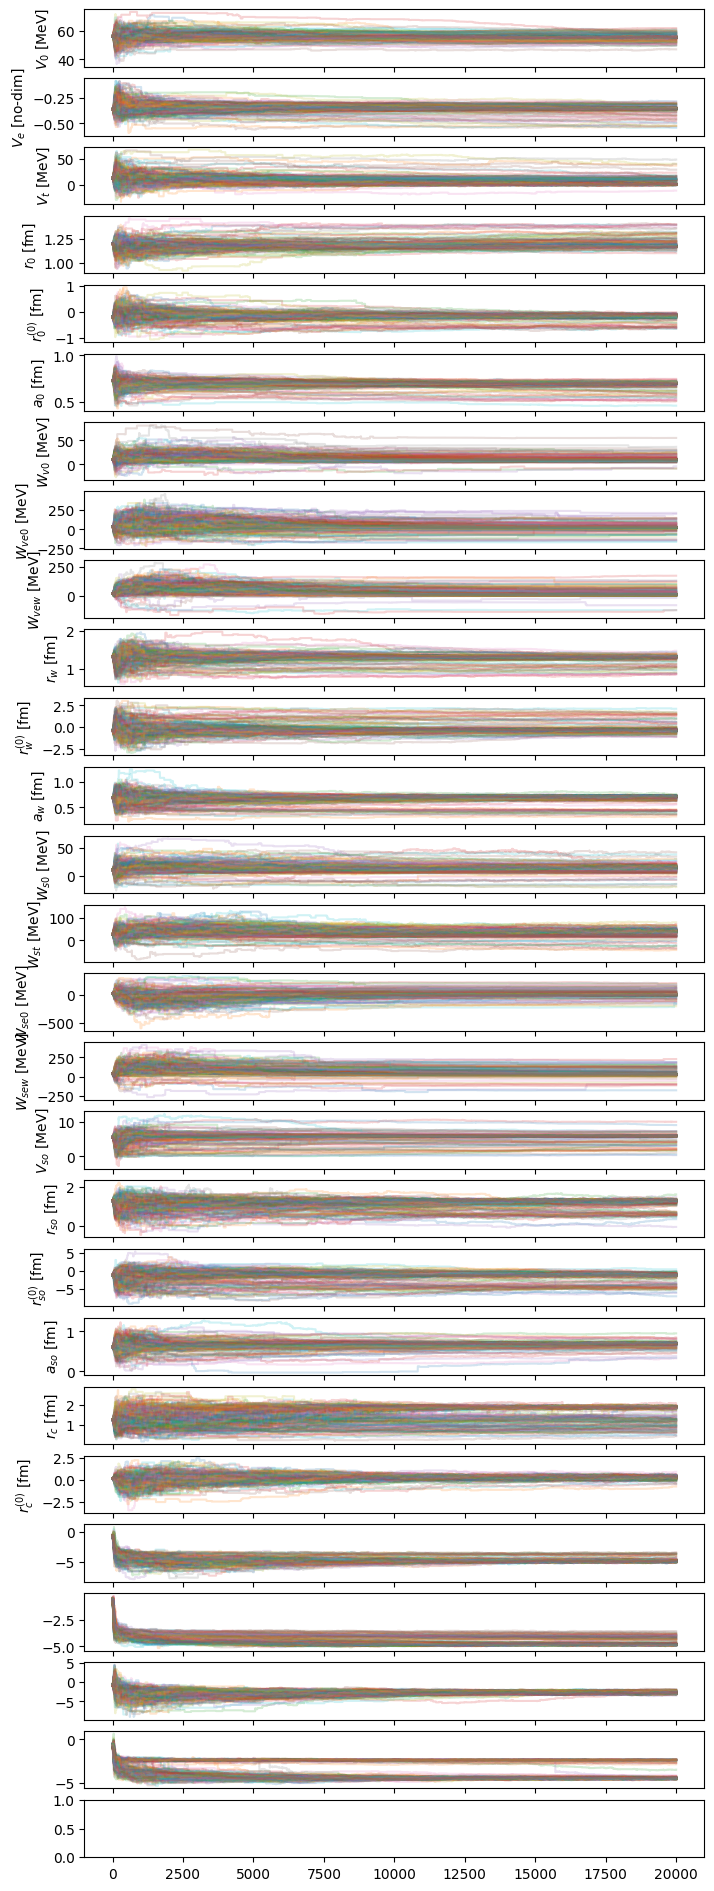

In [14]:
fig, axes = plt.subplots(n_params + 1, 1, figsize=(8, 24), sharex=True)
for i in range(n_params):
    for chain in range(n_chains):
        axes[i].plot(chains[ :,chain, i],  alpha=0.2)
        if i < 22:
            axes[i].set_ylabel(
                f"${elm.chuq.params[i].latex_name}$ [{elm.chuq.params[i].unit}]"
            )
        

## Corner plot

In [15]:
import jitr

In [16]:
chuq_samples=jitr.optical_potentials.chuq.get_samples_federal()

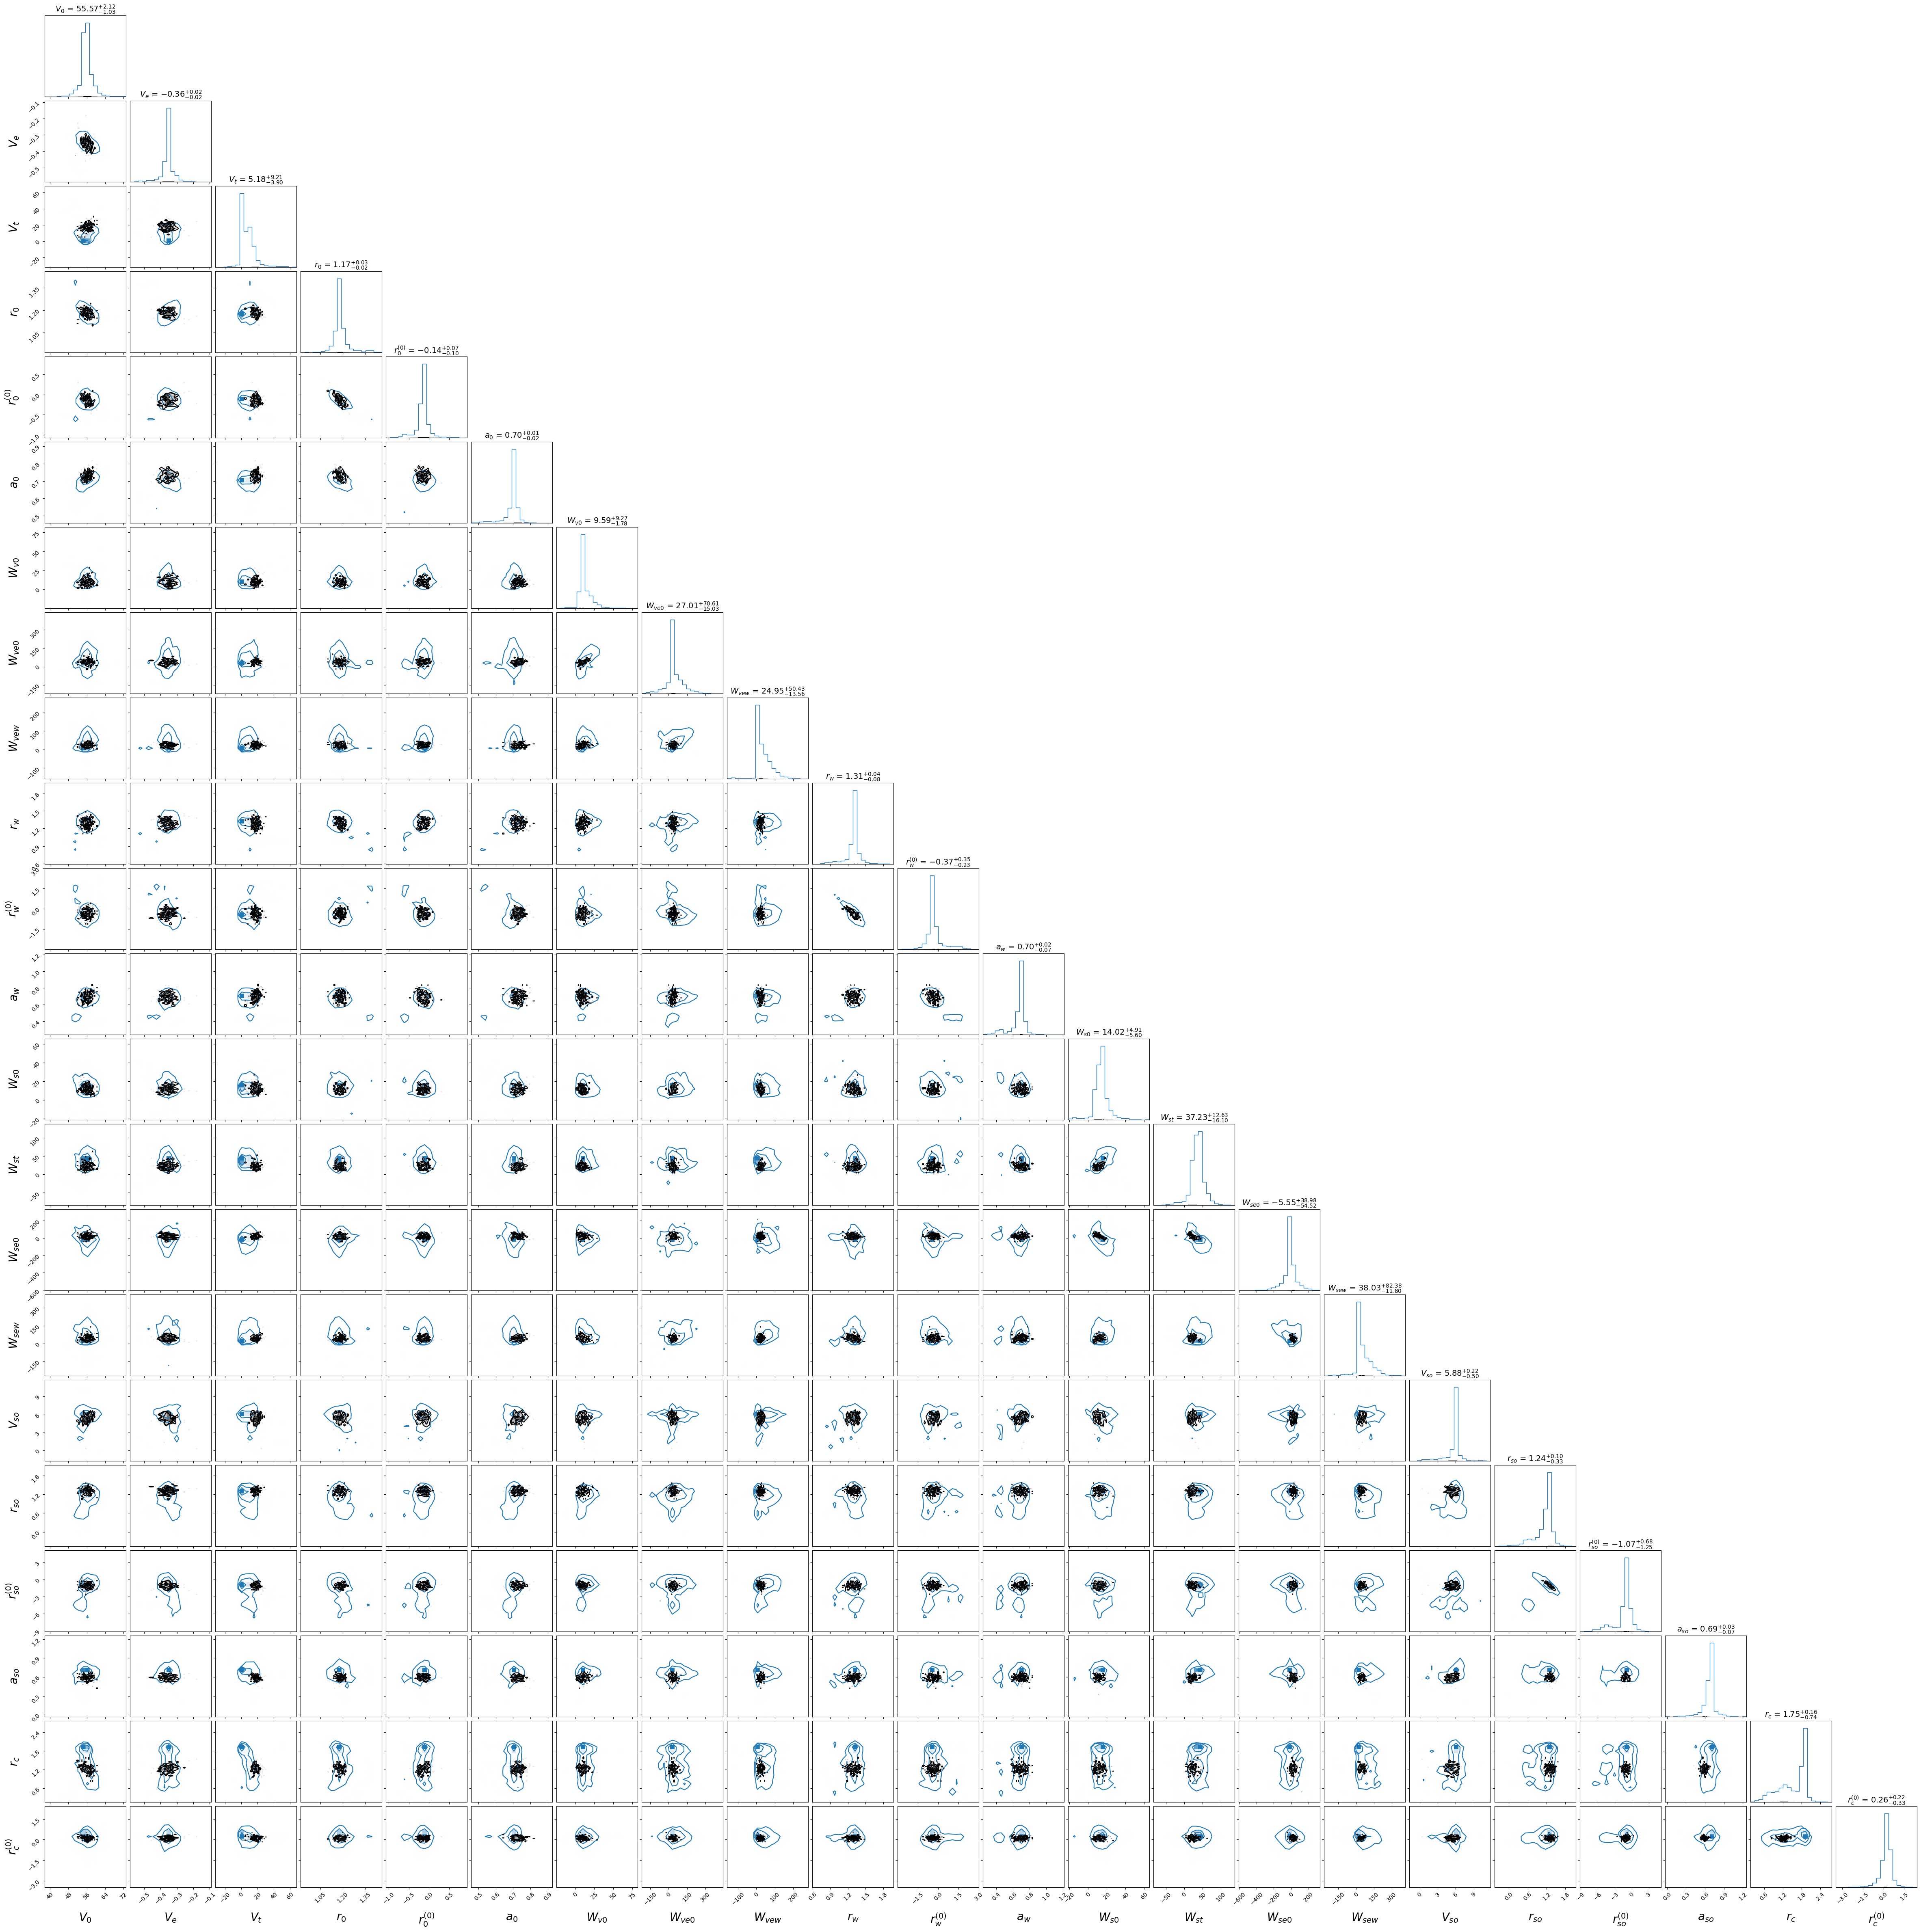

In [20]:
fig = corner(
    backend.get_chain(thin=100,flat=True)[...,:22],
    labels=[f"${p.latex_name}$" for p in elm.chuq.params],
    show_titles=True,
    title_kwargs={"fontsize": 14},
    label_kwargs={"fontsize": 20, "labelpad": 50},
    plot_density=True,
    plot_datapoints=False,
    color="tab:blue",
    # range=ranges,
)
fig = corner(chuq_samples, color="k", fig=fig)